In [106]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [107]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [108]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best parameters: {regression.best_params_}')

In [109]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values')
    plt.show()

In [110]:
df_train['Close'] = df_train['Close'].apply(lambda x : x.replace(',', '')).astype(float)
df = pd.concat([df_train, df_test])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1278 non-null   object 
 1   Open    1278 non-null   float64
 2   High    1278 non-null   float64
 3   Low     1278 non-null   float64
 4   Close   1278 non-null   float64
 5   Volume  1278 non-null   object 
dtypes: float64(4), object(2)
memory usage: 69.9+ KB


In [112]:
# sns.relplot(data=df, x='Date', y='Close', kind='line')

In [113]:
print('train: ', df_train.shape, 'test: ', df_test.shape, 'df: ', df.shape)

train:  (1258, 6) test:  (20, 6) df:  (1278, 6)


In [114]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Volume'] = df['Volume'].apply(lambda x : x.replace(',', '')).astype(float)
df.drop(columns=['Date'], inplace=True)
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,325.25,332.83,324.97,663.59,7380500.0,3,1,2012
1,331.27,333.87,329.08,666.45,5749400.0,4,1,2012
2,329.83,330.75,326.89,657.21,6590300.0,5,1,2012
3,328.34,328.77,323.68,648.24,5405900.0,6,1,2012
4,322.04,322.29,309.46,620.76,11688800.0,9,1,2012


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 19
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1278 non-null   float64
 1   High    1278 non-null   float64
 2   Low     1278 non-null   float64
 3   Close   1278 non-null   float64
 4   Volume  1278 non-null   float64
 5   Day     1278 non-null   int64  
 6   Month   1278 non-null   int64  
 7   Year    1278 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 89.9 KB


In [117]:
X = df.drop(['Close'], axis='columns')
y = df['Close']

In [118]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=17)

Одношарова:

In [119]:
perc_reg = MLPRegressor(max_iter=10000)

In [120]:
perc_reg.fit(X_train, y_train)

MLPRegressor(max_iter=10000)

In [121]:
predict_perc = perc_reg.predict(X_test)

regression_score(y_test, predict_perc)

RMSE: 188.29547783162602
MSE: 35455.18697184036
R2: -0.3958478373967924
MAPE: 140.35255089254025


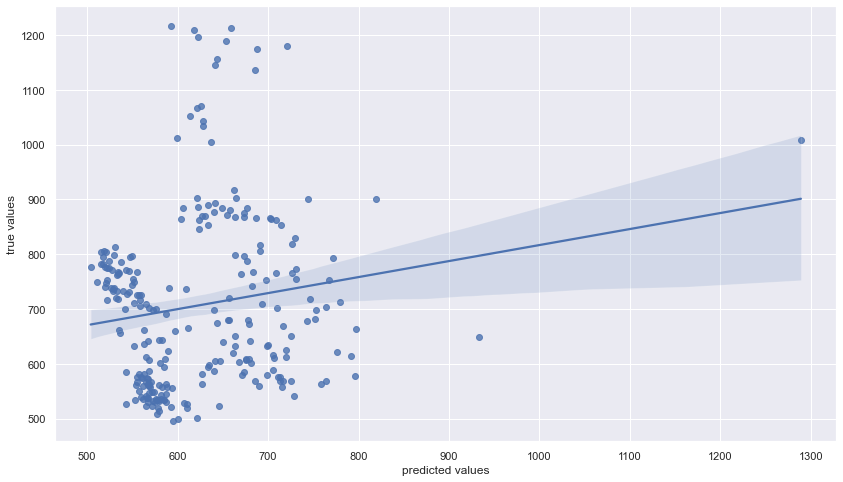

In [122]:
truepredplot(y_test, predict_perc)

In [123]:
predict_perc = perc_reg.predict(X_train)

regression_score(y_train, predict_perc)

RMSE: 202.55285171873578
MSE: 41027.65773939216
R2: -0.5093759835698772
MAPE: 151.75777960165522


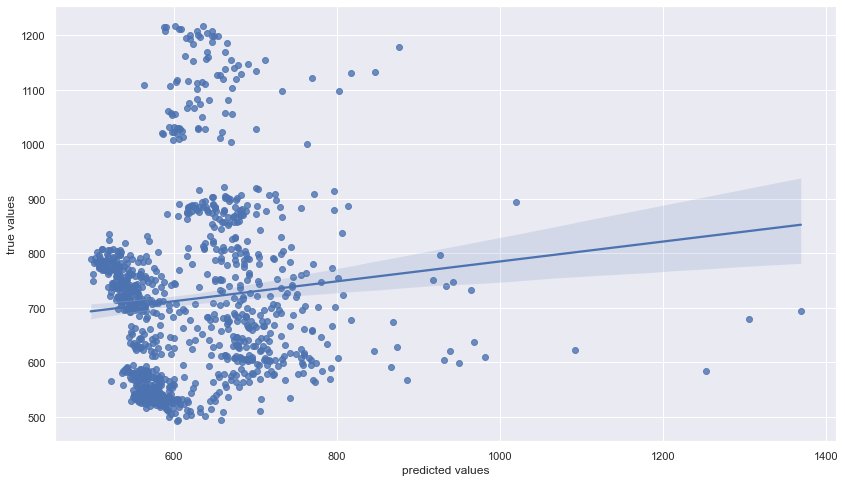

In [124]:
truepredplot(y_train, predict_perc)

Гіперпараметри:

In [125]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [126]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [127]:
gridsearchscore(perc_reg_gs)

Best score: -98910.67102515939, Best parameters: {'alpha': 0.01}


In [128]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 264.961501907218
MSE: 70204.5974929287
R2: -1.7639097112545903
MAPE: 220.0326129799972


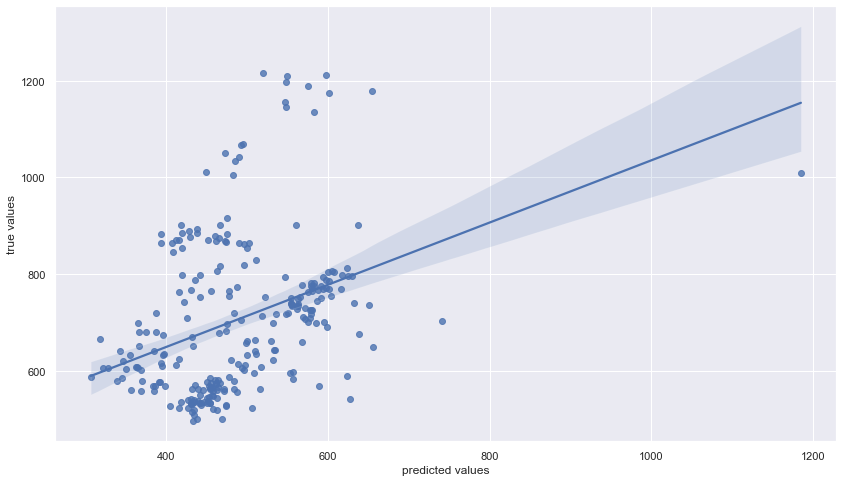

In [129]:
truepredplot(y_test, predict_perc_gs)

In [130]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 270.5155190630338
MSE: 73178.64605394262
R2: -1.6921861239456168
MAPE: 221.7814106583506


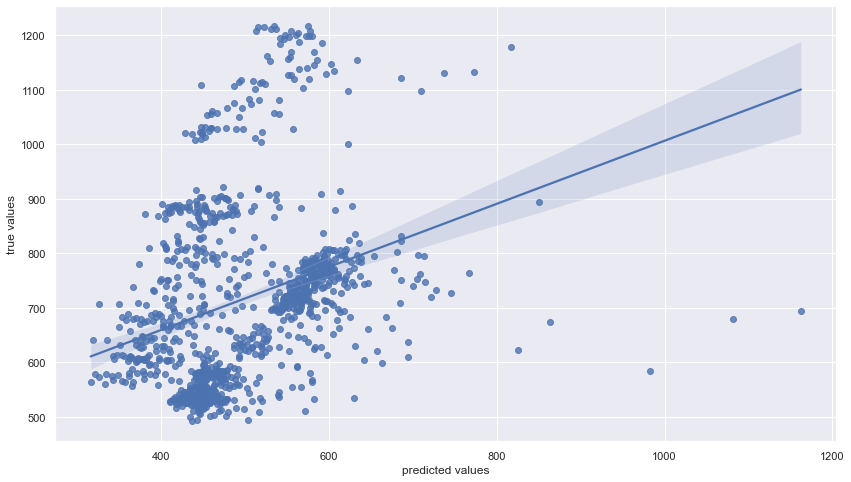

In [131]:
truepredplot(y_train, predict_perc_gs)

hidden_layer_sizes:

In [132]:
parameters = {'hidden_layer_sizes': [(50, ), (100, ), (150, )]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [133]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [134]:
gridsearchscore(perc_reg_gs)

Best score: -105571.65759064253, Best parameters: {'hidden_layer_sizes': (150,)}


In [135]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 287.75657835123434
MSE: 82803.84838441006
R2: -2.2599340905269862
MAPE: 180.90504475219944


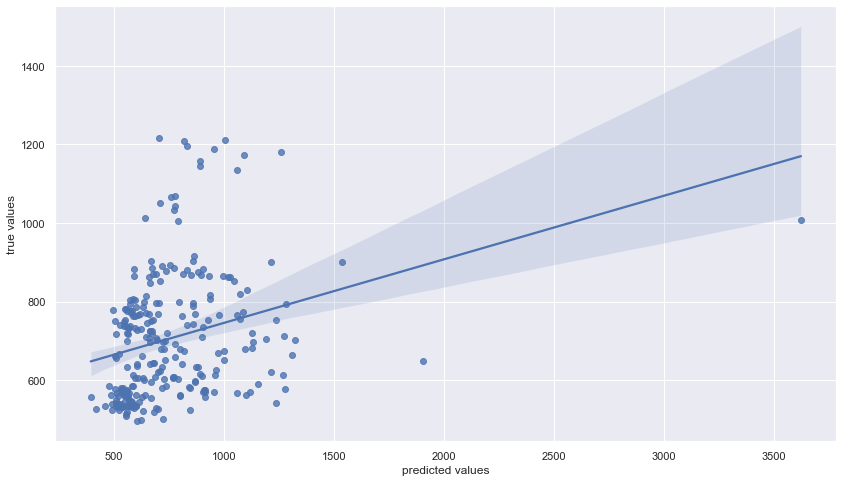

In [136]:
truepredplot(y_test, predict_perc_gs)

In [137]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 319.52044347937425
MSE: 102093.31380125601
R2: -2.7559345189409763
MAPE: 194.64876237387614


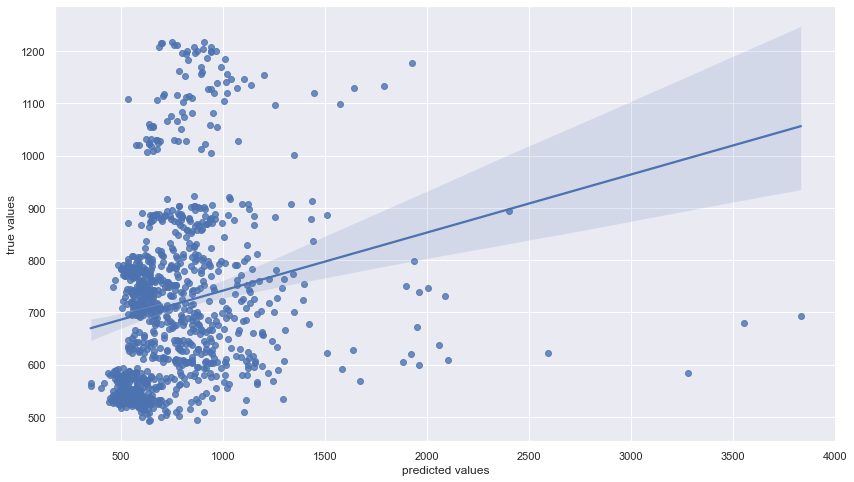

In [138]:
truepredplot(y_train, predict_perc_gs)

Разом:

In [139]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(10, ), (50, ), (100, ), (150, )]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [140]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [141]:
gridsearchscore(perc_reg_gs)

Best score: -66571.75217556207, Best parameters: {'alpha': 1, 'hidden_layer_sizes': (150,)}


In [142]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 387.8907060139715
MSE: 150459.1998120173
R2: -4.923481628819482
MAPE: 230.52294258822377


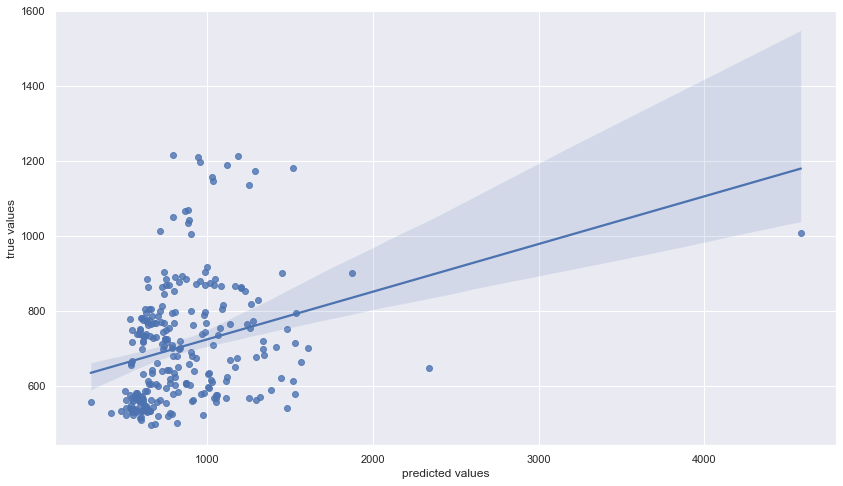

In [143]:
truepredplot(y_test, predict_perc_gs)

In [144]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 425.7228211417488
MSE: 181239.92044088943
R2: -5.667677324287991
MAPE: 245.67974680042394


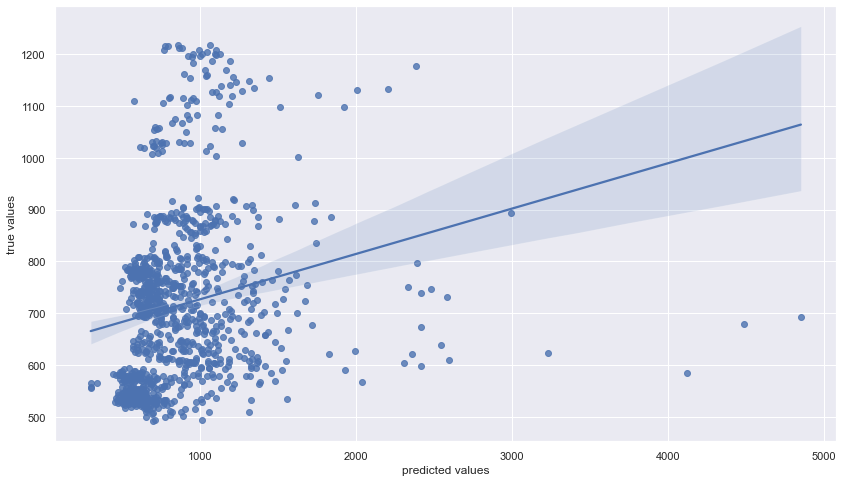

In [145]:
truepredplot(y_train, predict_perc_gs)

Двошарова:

In [146]:
parameters = {'alpha': [0.01, 0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(100, 50), (50, 100), (100, 100), (50, 50)]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [147]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(100, 50), (50, 100),
                                                (100, 100), (50, 50)]},
             scoring='neg_mean_squared_error')

In [148]:
gridsearchscore(perc_reg_gs)

Best score: -147938.50015628902, Best parameters: {'alpha': 0.1, 'hidden_layer_sizes': (50, 100)}


In [149]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 577.7987530182229
MSE: 333851.39898941334
R2: -12.143514196142384
MAPE: 374.76962691393953


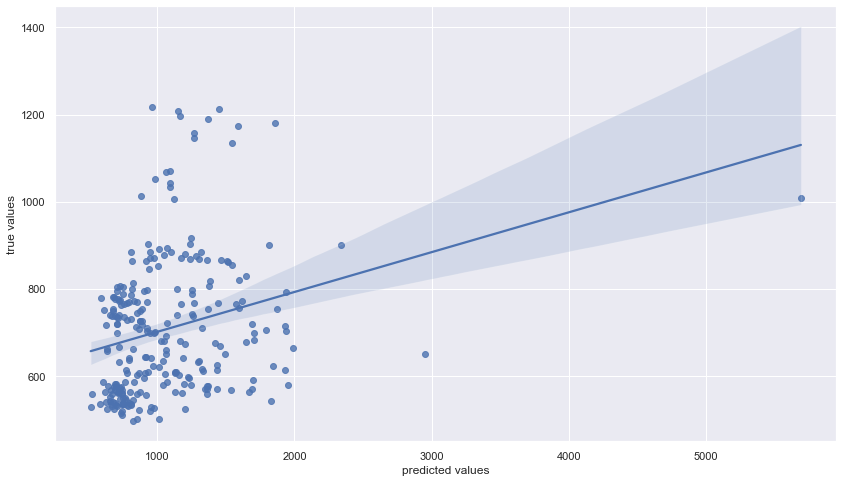

In [150]:
truepredplot(y_test, predict_perc_gs)

In [151]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 619.3375025311421
MSE: 383578.9420415125
R2: -13.11157435791699
MAPE: 390.92872311106635


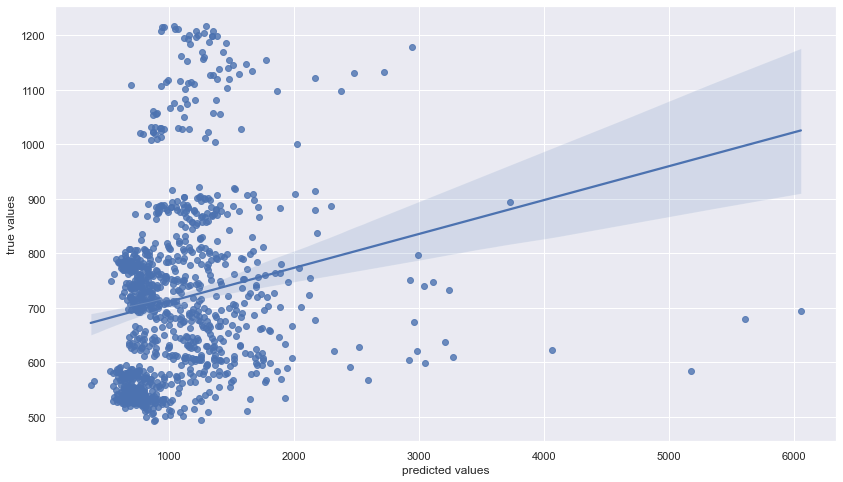

In [152]:
truepredplot(y_train, predict_perc_gs)

На цей раз я змішав усі дані і зробив великий датасет без задачі для моделі передбачити поведінку акцій на наступний тиждень. <br>
Насправді результати можна було передбачити самому ще наперед, оскільки графік акцій це не лінійна функція з великою кількістю локальних мінімумів, максимумів та перегинів, а оскільки перспептрон це лінійний регресор який завдяки шарам може шукати нелінійні залежності, то складно навіть уявити скільки потрібно було б шарів, щоби отримати задовільні результати для такого датасету <br>
Модель жахливо себе показує, від'ємне значення R^2 показує нам те, що пряма лінія точніше за нашу модель, так ще й велике від'ємне значення, робити ще більше шарів вважаю недоцільним, час компіляції буде великим, а шанс вгадати кілкість шарів дуже малим